#### Chocolate Sales Data – Exploratory Data Analysis (EDA) and Prediction


##### Importing required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

##### Data Loading, Cleaning & Transformation

In [9]:
df = pd.read_csv("Chocolate Sales.csv")
df.head()
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')>

In [23]:
#check for missing and duplicate values:
df.isnull().sum()




Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

In [20]:
print(df["Date"].dtype)
print(df["Amount"].dtype)
print(df["Boxes Shipped"].dtype)

object
object
int64


In [28]:
df["Date"] = pd.to_datetime(df["Date"],format = "%d-%b-%y")

df["Date"].head

df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df["Year"].head()


0    2022
1    2022
2    2022
3    2022
4    2022
Name: Year, dtype: int32

In [35]:
df["Amount"] = df["Amount"].replace({'$': '', ',': ''},regex=True).astype(float)
print(df["Amount"].dtype)

float64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   int32         
 7   Year           1094 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 60.0+ KB


#### Data Exploration

In [37]:
df.describe()

,Date,Amount,Boxes Shipped,Month,Year
count,1094,1094.000000,1094.000000,1094.000000,1094.0
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989,4.576782,2022.0
min,2022-01-03 00:00:00,7.000000,1.000000,1.000000,2022.0
25%,2022-03-02 00:00:00,2390.500000,70.000000,3.000000,2022.0
50%,2022-05-11 00:00:00,4868.500000,135.000000,5.000000,2022.0
75%,2022-07-04 00:00:00,8027.250000,228.750000,7.000000,2022.0
max,2022-08-31 00:00:00,22050.000000,709.000000,8.000000,2022.0
std,NaN,4102.442014,121.544145,2.316465,0.0


##### Univariate Analysis

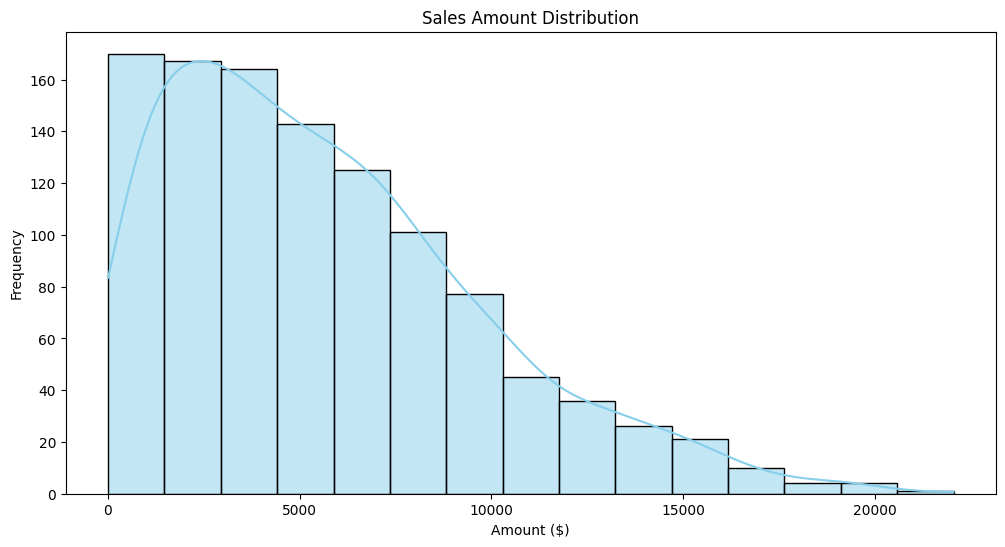

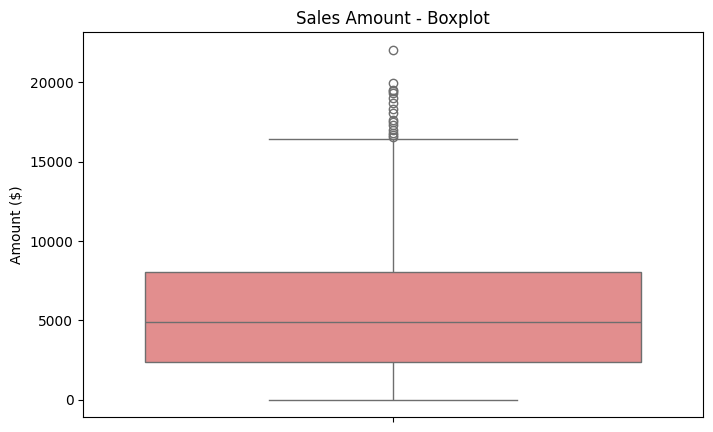

In [48]:
#Sales Amount Distribution

plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], kde=True, bins = 15, color='skyblue')
plt.title('Sales Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(y='Amount', data=df, color='lightcoral')
plt.title('Sales Amount - Boxplot')
plt.ylabel('Amount ($)')
plt.show()

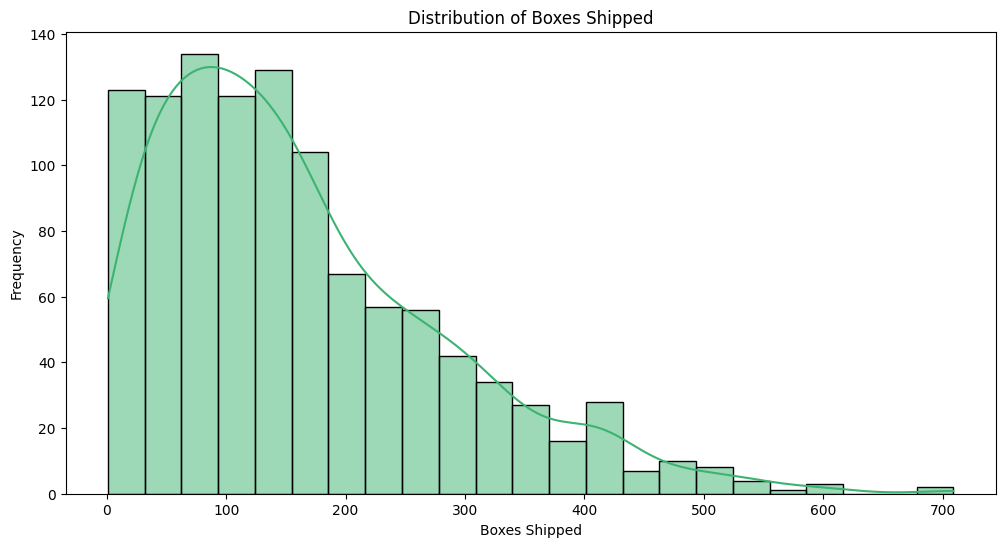

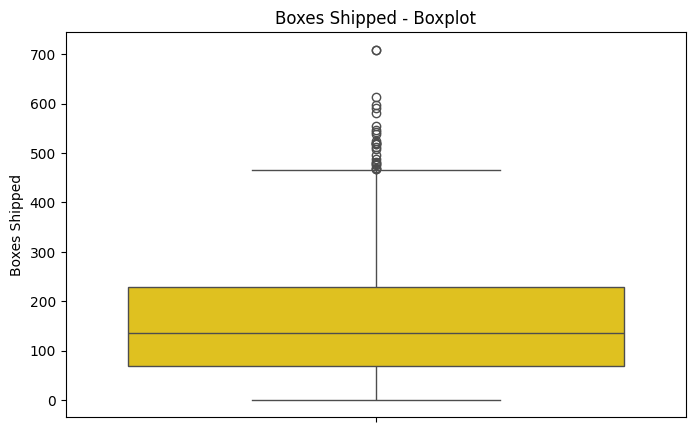

In [ ]:
#Box shipped Distribution

plt.figure(figsize=(12, 6))
sns.histplot(df['Boxes Shipped'], kde=True, color='mediumseagreen')
plt.title('Distribution of Boxes Shipped')
plt.xlabel('Boxes Shipped')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(y='Boxes Shipped', data=df, color='gold')
plt.title('Boxes Shipped - Boxplot')
plt.ylabel('Boxes Shipped')
plt.show()



##### Categorical Analysis

C:\Users\kGelli\AppData\Local\Temp\ipykernel_19832\1378908319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', palette='viridis')


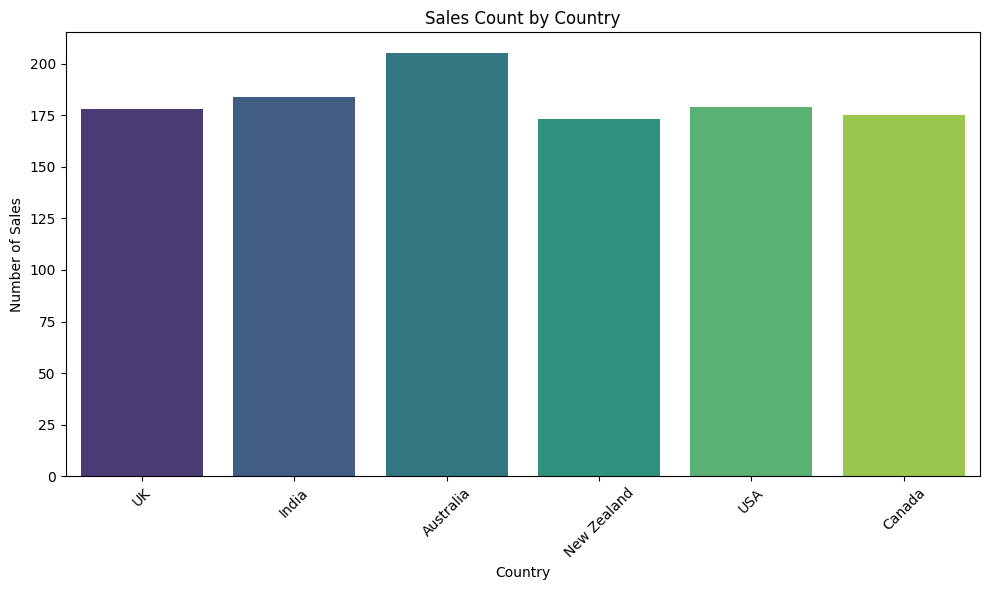

In [50]:
#Sales count by country

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', palette='viridis')
plt.title('Sales Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\kGelli\AppData\Local\Temp\ipykernel_19832\4250585708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product', palette='plasma', order=df['Product'].value_counts().index)


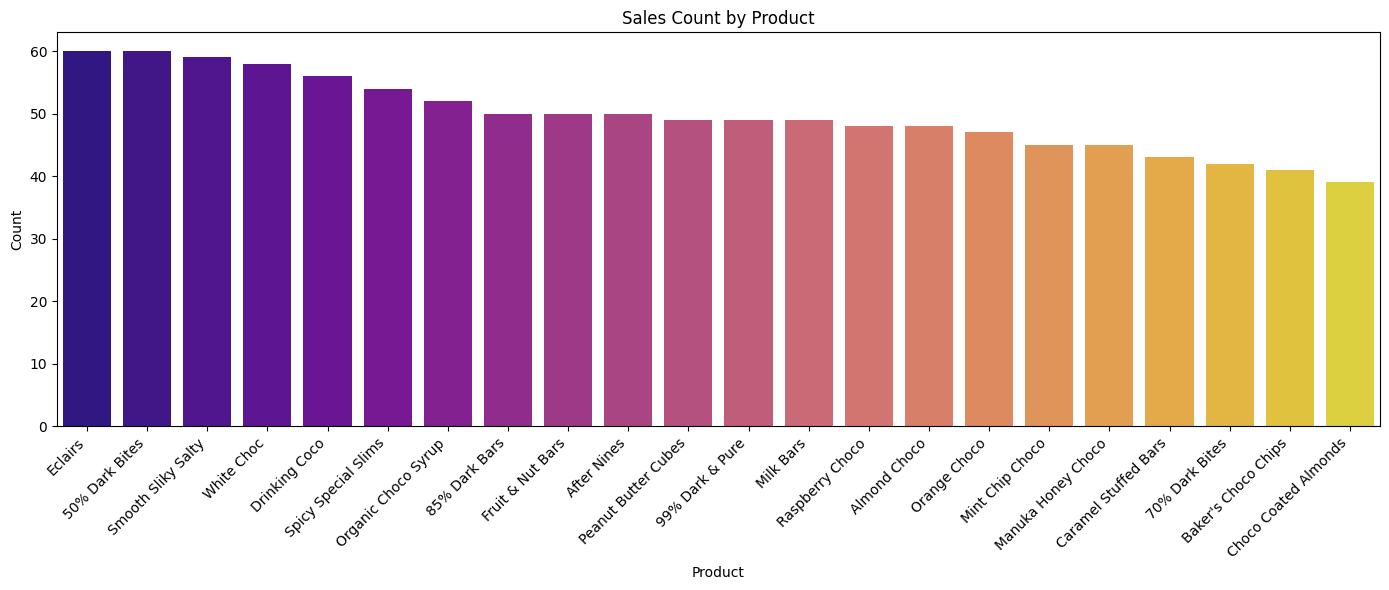

In [51]:
#Sales County by Product

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Product', palette='plasma', order=df['Product'].value_counts().index)
plt.title('Sales Count by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\kGelli\AppData\Local\Temp\ipykernel_19832\995272996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sales Person', palette='cividis', order=df['Sales Person'].value_counts().index)


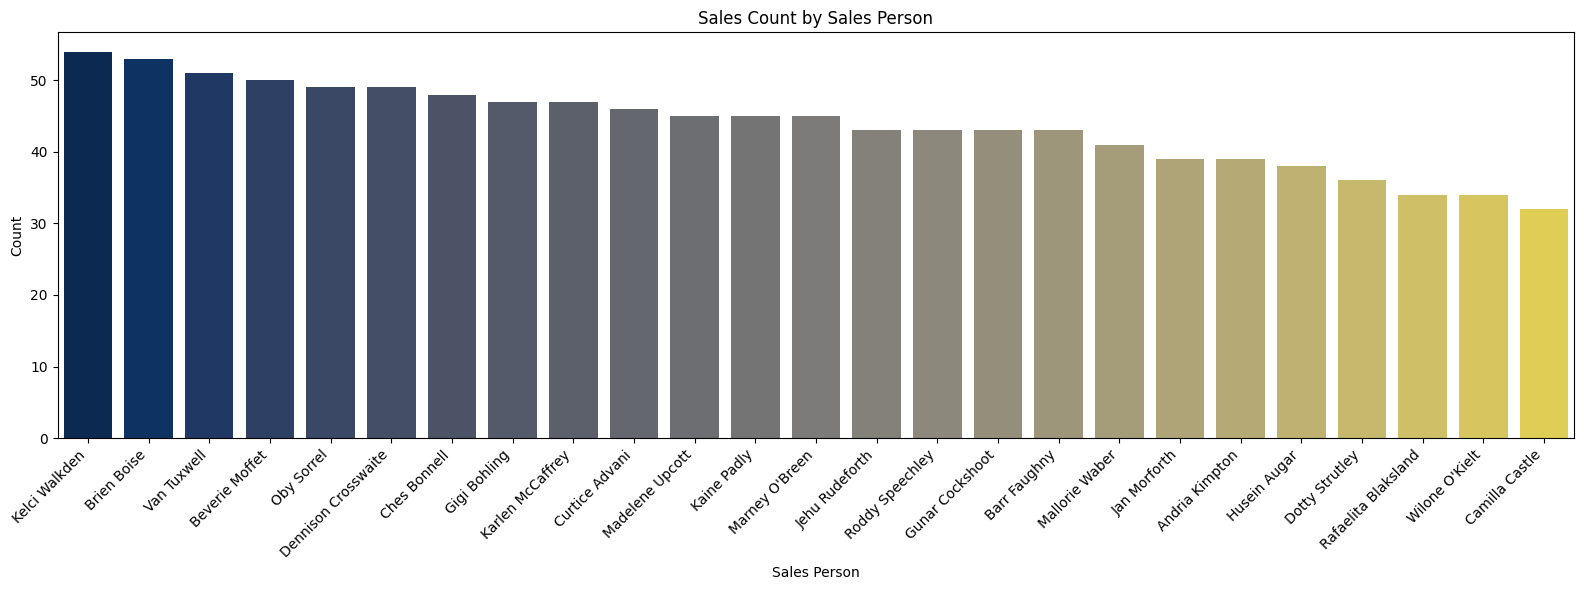

In [55]:
#Sales Count by Sales Person

plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Sales Person', palette='cividis', order=df['Sales Person'].value_counts().index)
plt.title('Sales Count by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


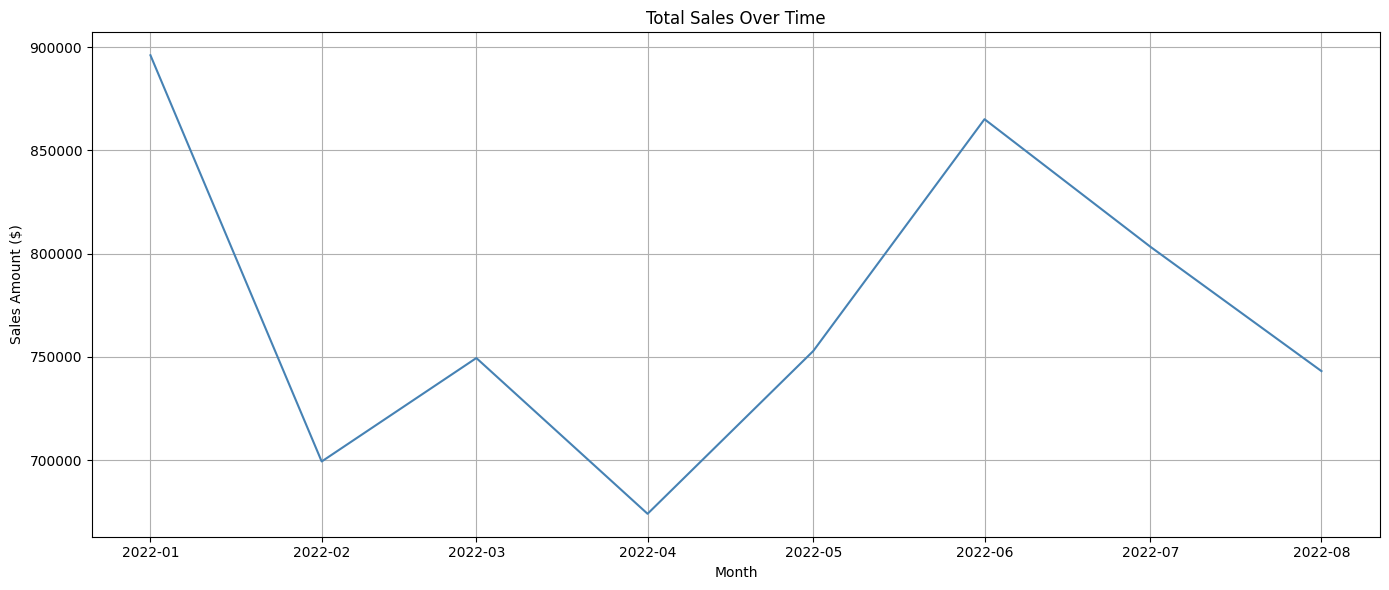

In [57]:
#Monthly Sales Trend

monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Amount', color='steelblue')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### MultiVariate Analysis

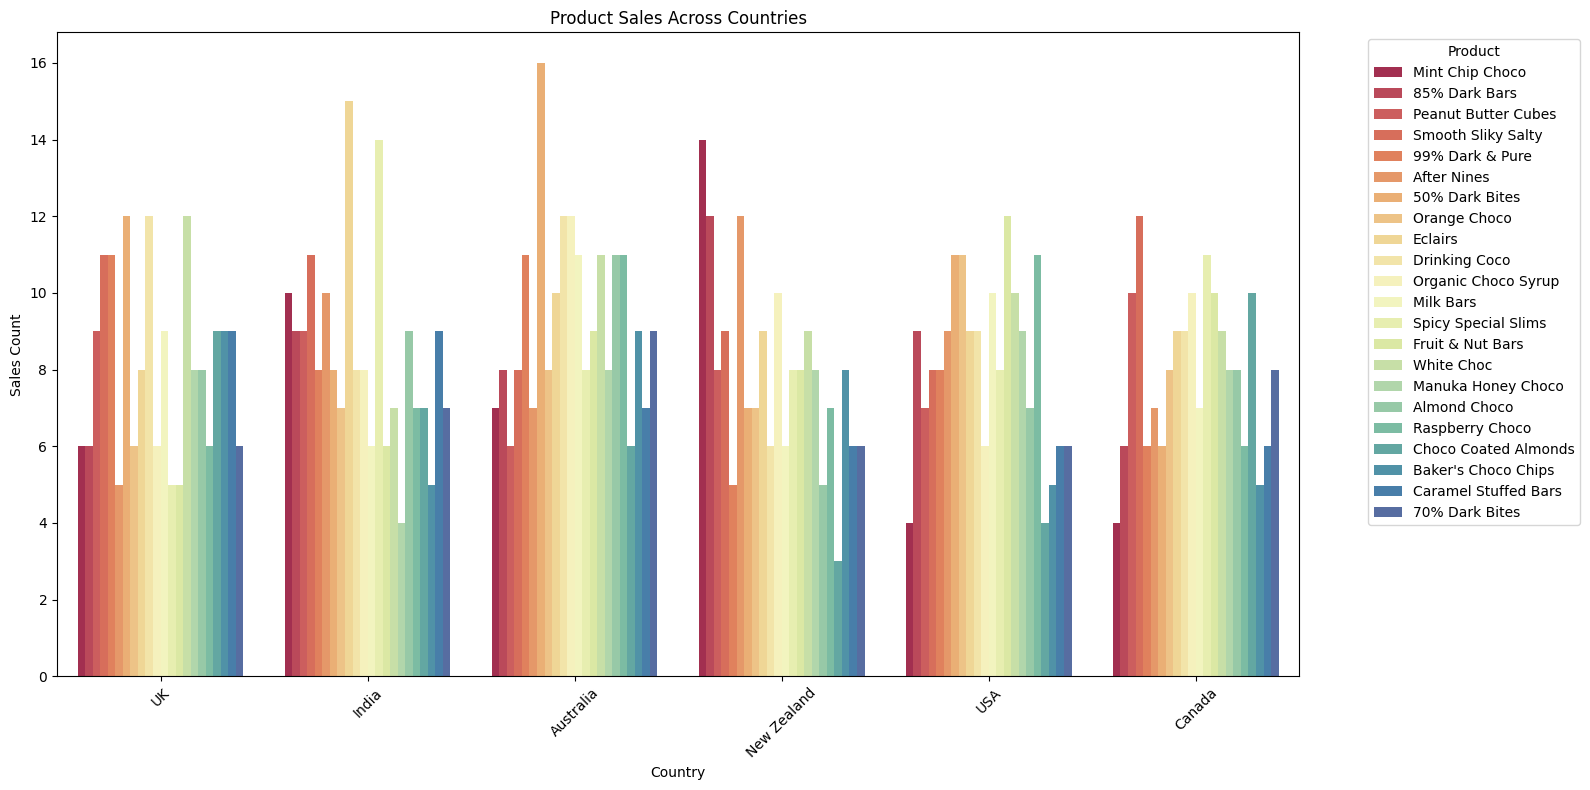

In [60]:
#Sales Distribution Across Country and Product

plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Country', hue='Product', palette='Spectral')
plt.title('Product Sales Across Countries')
plt.xlabel('Country')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [67]:
#Sales Performance by Sales Person
performance = df.groupby('Sales Person')['Amount'].agg(['sum', 'mean']).reset_index()
performance.columns = ['Sales Person', 'Total Sales', 'Average Sales']

print(performance)

           Sales Person  Total Sales  Average Sales
0        Andria Kimpton     201747.0    5173.000000
1          Barr Faughny     258713.0    6016.581395
2        Beverie Moffet     278922.0    5578.440000
3           Brien Boise     312816.0    5902.188679
4        Camilla Castle     196616.0    6144.250000
5          Ches Bonnell     320901.0    6685.437500
6        Curtice Advani     216461.0    4705.673913
7   Dennison Crosswaite     291669.0    5952.428571
8        Dotty Strutley     190624.0    5295.111111
9          Gigi Bohling     232666.0    4950.340426
10      Gunar Cockshoot     238483.0    5546.116279
11         Husein Augar     205212.0    5400.315789
12         Jan Morforth     219667.0    5632.487179
13       Jehu Rudeforth     220976.0    5138.976744
14          Kaine Padly     266490.0    5922.000000
15     Karlen McCaffrey     223895.0    4763.723404
16        Kelci Walkden     311710.0    5772.407407
17      Madelene Upcott     316099.0    7024.422222
18       Mal

C:\Users\kGelli\AppData\Local\Temp\ipykernel_19832\2678858593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance.sort_values('Total Sales', ascending=False), x='Sales Person', y='Total Sales', palette='magma')


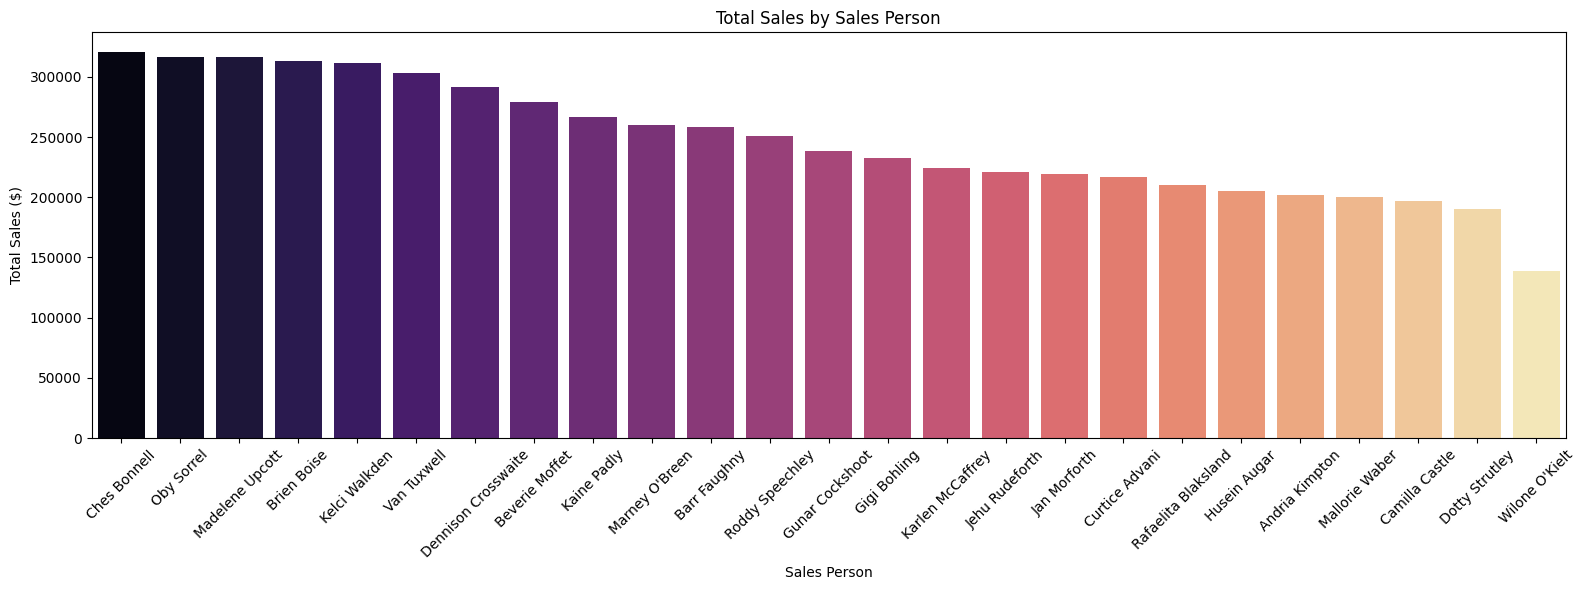

In [79]:
plt.figure(figsize=(16, 6))
sns.barplot(data=performance.sort_values('Total Sales', ascending=False), x='Sales Person', y='Total Sales', palette='magma')
plt.title('Total Sales by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [118]:
product_sales = df.groupby("Product")["Amount"].sum()
product_sales_mean = df.groupby("Product")["Amount"].mean()

print(product_sales_mean)

Product
50% Dark Bites          5695.200000
70% Dark Bites          5038.333333
85% Dark Bars           5984.580000
99% Dark & Pure         6118.285714
After Nines             5226.620000
Almond Choco            5782.000000
Baker's Choco Chips     6088.121951
Caramel Stuffed Bars    5385.767442
Choco Coated Almonds    6191.948718
Drinking Coco           4583.125000
Eclairs                 5207.416667
Fruit & Nut Bars        5182.940000
Manuka Honey Choco      6123.133333
Milk Bars               5494.857143
Mint Chip Choco         6310.422222
Orange Choco            5449.872340
Organic Choco Syrup     5667.307692
Peanut Butter Cubes     6629.428571
Raspberry Choco         5515.416667
Smooth Sliky Salty      5926.983051
Spicy Special Slims     5434.333333
White Choc              5674.948276
Name: Amount, dtype: float64


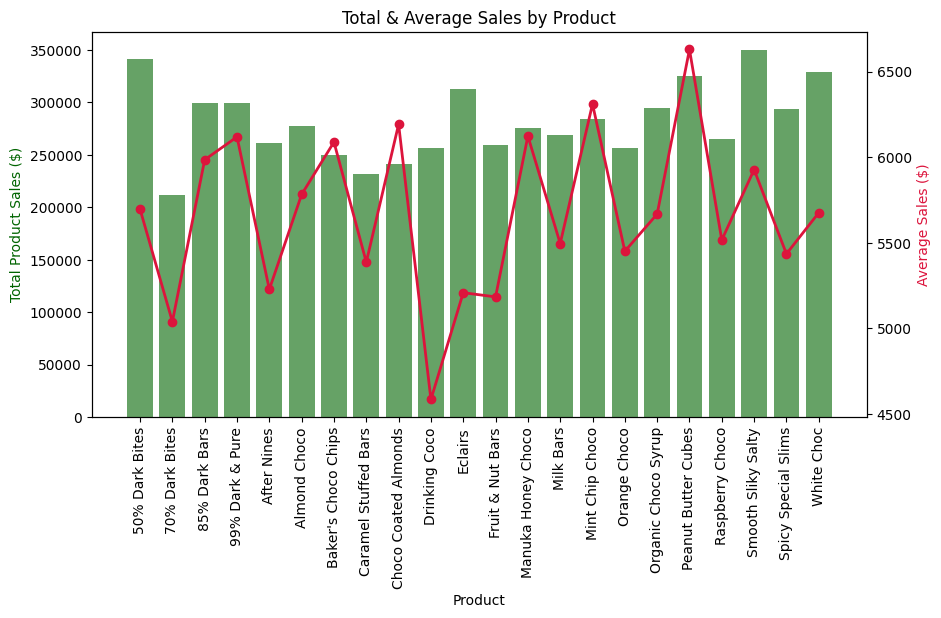

In [119]:
# Create a figure and subplot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot total sales as a bar chart
ax1.bar(product_sales.index, product_sales, color="darkgreen", alpha=0.6, label="Product Total Sales")

# Format y-axis to show whole numbers with commas
#ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Labels
plt.xticks(rotation=90)
ax1.set_ylabel("Total Product Sales ($)", color="darkgreen")
ax1.set_xlabel("Product")
ax1.set_title("Total & Average Sales by Product")

# Second y-axis for average sales
ax2 = ax1.twinx()
ax2.plot(product_sales_mean.index, product_sales_mean, color="crimson", marker="o", linewidth=2, label="Avg Sales")


# Format the second y-axis as well
#ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax2.set_ylabel("Average Sales ($)", color="crimson")

# Show the chart
plt.show()

In [ ]:
#Total sales distribution by countries

top_countries = df.groupby('Country')['Amount'].agg('sum').head(10).reset_index()
top_countries.columns = ["Country", "Total Sales Amount"]
print(top_countries)


       Country  Total Sales Amount
0    Australia           1137367.0
1       Canada            962899.0
2        India           1045800.0
3  New Zealand            950418.0
4           UK           1051792.0
5          USA           1035349.0


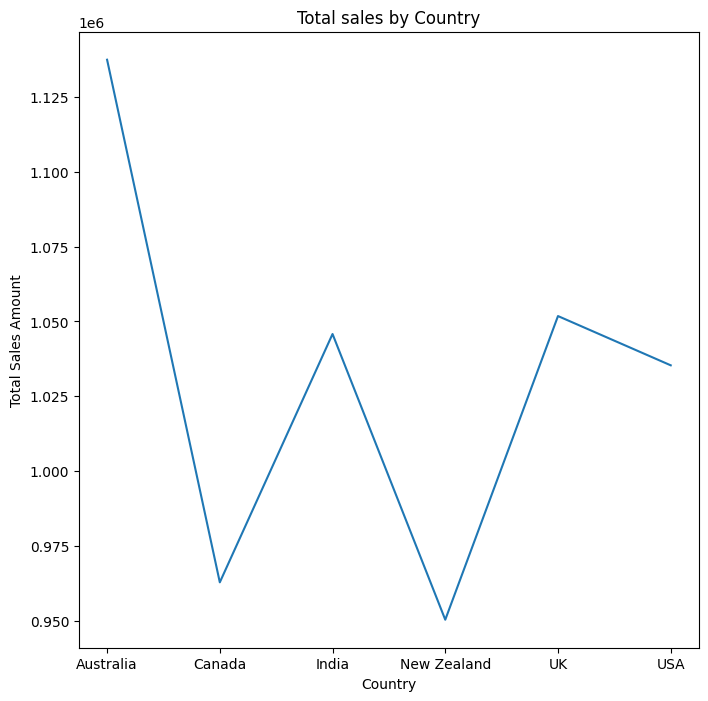

In [116]:
plt.figure(figsize = (8,8))
sns.lineplot(data = top_countries, x = "Country", y = "Total Sales Amount")
plt.title("Total sales by Country")
plt.show()

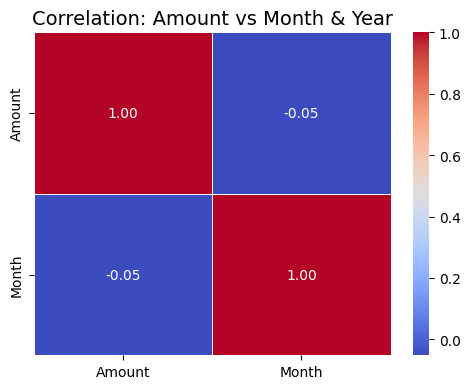

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the relevant numeric columns
selected_columns = ['Amount', 'Month']  # Add/remove columns as needed
corr_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation: Amount vs Month & Year', fontsize=14)
plt.tight_layout()
plt.show()


#### Future Sales Prediction 

In [137]:
df.columns = df.columns.str.strip()
df['Boxes Shipped'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.month.fillna(0).astype(int)

In [139]:
#One-Hot Encoding for categorical features
df_encoded = pd.get_dummies(df[['Product', 'Country', 'Month', 'Boxes Shipped']], drop_first=True)

In [141]:
#Define features (X) and target (y)
X = df_encoded
y = df["Amount"]

In [142]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
#Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [144]:
#Prediction
y_pred = model.predict(X_test)

R^2 Score: -0.05100935865279088
RMSE: 4130.157714857918


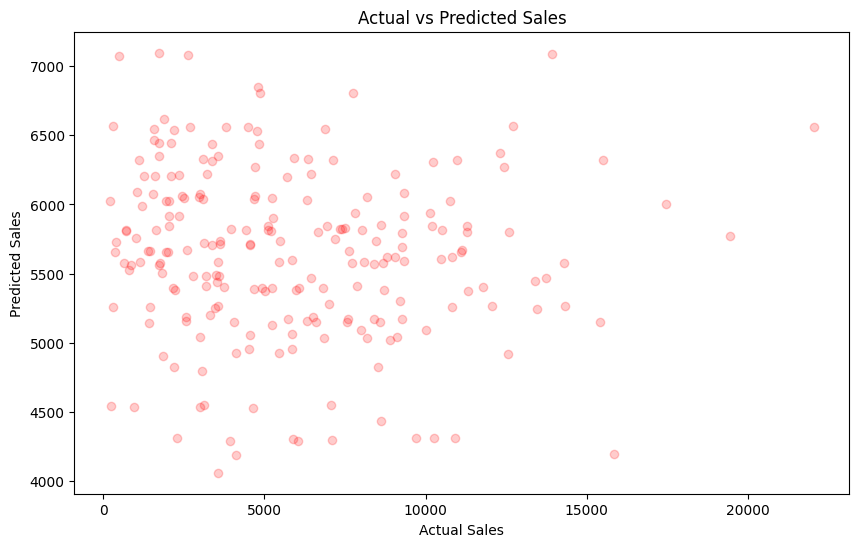

In [ ]:
#Evaluate
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

#Visualize predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2, color='red')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()